<a id="1"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries And Utilities</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import lazypredict
from lazypredict.Supervised import LazyClassifier
import xgboost as xgb

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from yellowbrick.model_selection import FeatureImportances

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


<a id="2"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Processed Dataset from previous Notebook</h1>

[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [53]:
plasma = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/plasma(Specific Metabolics)_final2.csv')
serum = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/serum(Specific Metabolics)_final2.csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [48]:
plasma

,asparagine,benzoic acid,tryptophan,uric acid,5-hydroxynorvaline NIST,alpha-ketoglutarate,citrulline,glutamine,hypoxanthine,malic acid,...,lactic acid,maltose,maltotriose,N-methylalanine,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,Class
0,-0.38,-1.31,0.52,-1.02,-0.85,0.51,-0.33,-0.19,0.42,0.76,...,-0.04,-0.34,-1.21,-0.10,-0.10,0.03,-0.27,1.38,0.41,disease
1,0.95,-0.46,-0.90,-1.24,-0.82,-0.39,0.69,1.04,1.37,0.09,...,0.15,-0.29,-0.13,-1.19,0.22,-0.83,-0.41,0.29,-0.16,disease
2,0.69,-0.49,0.83,-0.23,-0.35,0.35,-0.56,0.36,-0.31,0.06,...,1.06,0.24,0.68,-0.71,0.98,0.02,0.95,-0.19,0.83,disease
3,0.35,1.68,-1.11,-0.48,-0.74,-0.75,-0.99,1.15,1.91,-0.41,...,0.53,-0.19,-0.38,1.83,0.69,-0.19,-0.59,-0.66,1.25,disease
4,0.30,-1.20,0.01,0.76,0.99,-0.14,0.77,-0.31,0.25,0.76,...,-0.33,-0.01,1.43,0.91,-0.27,0.32,0.52,-0.09,0.08,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.77,-0.63,0.98,0.05,-0.29,-0.30,0.08,1.06,-0.66,-0.97,...,-0.72,-0.35,-0.38,0.75,-0.68,-0.45,-0.96,-0.12,-0.37,control
78,-0.43,-1.06,-0.03,1.56,-0.20,-0.64,-0.41,-0.13,5.19,-0.67,...,0.64,-0.19,-0.60,0.51,0.79,-0.42,-0.22,-0.51,-0.23,control
79,-0.10,1.50,0.94,0.30,-0.08,0.78,0.91,1.47,-0.67,1.22,...,-0.53,-0.35,0.05,-0.94,-0.44,-0.24,-0.67,-0.36,-0.54,control
80,-1.22,0.90,-1.34,-0.01,-0.80,-0.14,-1.17,-1.39,-0.44,-0.09,...,-0.46,-0.50,-0.83,0.70,-0.18,-0.44,-0.92,-0.10,-1.05,control


Keep labels as an numpy array.

In [49]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

<a id="3"></a>

<h1 style="background-color:#d8f8b7;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Models</h1>

In [50]:
# !pip install lazypredict

In [82]:
from sklearn.feature_selection import RFECV

def rfecv_accuracy(plasma, meta_number, classifier):
    accuracy = []

    for i in range(1, meta_number+1):
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})

        if plasma.columns[-1]=='Class':
            X = plasma.drop('Class', axis=1)
        else:
            X = plasma

        X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=0)

        scaler = RobustScaler()
        cols = X.columns
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        X_train = pd.DataFrame(X_train, columns=[cols])
        X_test = pd.DataFrame(X_test, columns=[cols])

        y_train = y_train.values.reshape(-1, 1)
        y_test = y_test.values.reshape(-1, 1)

        rfecv = RFECV(
            estimator=RandomForestClassifier(),
            min_features_to_select=i,
            step=5,
            n_jobs=-1,
            scoring="accuracy",
            cv=10,
        )

        _ = rfecv.fit(X_train, y_train)

        meta_selected = []
        for j in range(i):
            meta_selected.append(X.columns[rfecv.support_][j])
        print(meta_selected)

        name = ['Plasma(Raw)']
        dfs = [plasma[meta_selected]]

        random_state = 42

        for idx, data in enumerate(dfs):
            result = []
            if data.columns[-1]=='Class':
                X = data.drop('Class', axis=1)
            else:
                X = data
            y = plasma['Class'].copy()
            y = y.map({"control": 0, "disease": 1})
    #         print(X, y)
            rs = ShuffleSplit(n_splits=10, test_size=0.2, random_state=random_state)

            for train_index, test_index in rs.split(X):
                clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                scaler = RobustScaler()

                cols = X_train.columns
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                X_train = pd.DataFrame(X_train, columns=[cols])
                X_test = pd.DataFrame(X_test, columns=[cols])

                models, predictions = clf.fit(X_train, X_test, y_train, y_test)
                result.append(models)
            #     print(result)

            acc = []
            for a in range(10):
                acc.append(result[a].loc[classifier]['Balanced Accuracy'])

    #     print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([i, sum(acc)/ len(acc)])
        print(accuracy)
    return accuracy

#     accuracy_df1 = pd.DataFrame(accuracy, columns=['Method', 'Accuracy'])
#     accuracy_df1

# Plasma

In [83]:
plasma_accuracy = rfecv_accuracy(plasma, 26, 'RidgeClassifier')

  7%|▋         | 2/29 [00:00<00:01, 19.79it/s]

['adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 38.04it/s]


[[1, 0.6893939393939394]]


  7%|▋         | 2/29 [00:00<00:01, 17.29it/s]

['asparagine', 'benzoic acid']


100%|██████████| 29/29 [00:00<00:00, 39.43it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 17.61it/s]

['asparagine', 'benzoic acid', 'tryptophan']


100%|██████████| 29/29 [00:00<00:00, 30.66it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 18.71it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 40.89it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094]]


  3%|▎         | 1/29 [00:00<00:02,  9.98it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 41.00it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394]]


 14%|█▍        | 4/29 [00:00<00:00, 33.84it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine']


100%|██████████| 29/29 [00:00<00:00, 38.75it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.46it/s]

['uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 39.00it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.78it/s]

['nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'maltose', 'phenol', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.42it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726]]


  7%|▋         | 2/29 [00:00<00:01, 17.90it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'hypoxanthine', 'malic acid', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate']


100%|██████████| 29/29 [00:00<00:00, 43.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094]]


 10%|█         | 3/29 [00:00<00:01, 25.33it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate']


100%|██████████| 29/29 [00:00<00:00, 41.12it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 18.17it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide']


100%|██████████| 29/29 [00:00<00:00, 37.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759]]


 10%|█         | 3/29 [00:00<00:00, 28.81it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine']


100%|██████████| 29/29 [00:00<00:00, 42.41it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213]]


  7%|▋         | 2/29 [00:00<00:01, 16.94it/s]

['5-hydroxynorvaline NIST', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 41.97it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726]]


 10%|█         | 3/29 [00:00<00:00, 26.92it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 41.25it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 17.59it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine']


100%|██████████| 29/29 [00:00<00:00, 39.79it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667]]


  7%|▋         | 2/29 [00:00<00:01, 17.82it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'methionine sulfoxide', 'nornicotine', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.67it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181]]


 10%|█         | 3/29 [00:00<00:00, 27.28it/s]

['tryptophan', '5-hydroxynorvaline NIST', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 44.95it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181]]


  7%|▋         | 2/29 [00:00<00:01, 18.14it/s]

['uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 34.72it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.00it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose']


100%|██████████| 29/29 [00:00<00:00, 37.82it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0]]


  7%|▋         | 2/29 [00:00<00:01, 17.75it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid']


100%|██████████| 29/29 [00:00<00:00, 33.86it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 16.56it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 37.95it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 17.95it/s]

['benzoic acid', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 33.93it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548]]


 10%|█         | 3/29 [00:00<00:00, 28.29it/s]

['benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 39.89it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 18.29it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate']


100%|██████████| 29/29 [00:00<00:00, 41.66it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0]]


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.24it/s]


[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0], [25, 0.9545454545454548]]


  7%|▋         | 2/29 [00:00<00:01, 16.55it/s]

['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'maltotriose', 'N-methylalanine', 'phenol', 'phosphoethanolamine', 'pyrophosphate', 'pyruvic acid', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 33.20it/s]

[[1, 0.6893939393939394], [2, 0.7803030303030303], [3, 0.7803030303030303], [4, 0.9090909090909094], [5, 0.6893939393939394], [6, 0.9090909090909094], [7, 0.9090909090909094], [8, 0.7727272727272726], [9, 0.9090909090909094], [10, 0.9545454545454548], [11, 0.8257575757575759], [12, 0.8712121212121213], [13, 0.7727272727272726], [14, 0.9090909090909094], [15, 0.9166666666666667], [16, 0.8181818181818181], [17, 0.8181818181818181], [18, 0.9090909090909094], [19, 1.0], [20, 0.9090909090909094], [21, 0.9545454545454548], [22, 0.9545454545454548], [23, 0.9545454545454548], [24, 1.0], [25, 0.9545454545454548], [26, 0.9545454545454548]]


In [3]:
plasma_accuracy = pd.DataFrame(plasma_accuracy, columns= ["Number of Metabolites", "Accuracy"])

In [5]:
plasma_accuracy.to_csv("Plasma Accuracy.csv", index=False)

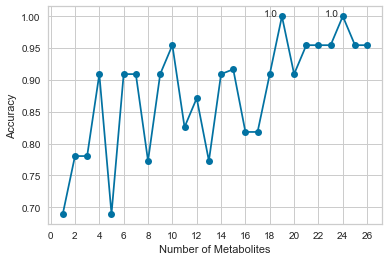

In [6]:
fig = plt.gcf()
# plt.figure(figsize=(10, 6))

plt.plot(plasma_accuracy["Number of Metabolites"], plasma_accuracy.Accuracy, 'o-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Metabolites')
# plt.title('Plasma RFECV Accuracy Plot')
plt.annotate("1.0", (17.5, 1))
plt.annotate("1.0", (22.5, 1))
plt.xticks(np.arange(0, 26+1, 2))
plt.show()
fig.savefig('Plasma RFECV Accuracy Plot.png', dpi=500)

# Serum

In [86]:
serum_accuracy = rfecv_accuracy(serum, 16, 'XGBClassifier')

  7%|▋         | 2/29 [00:00<00:01, 19.04it/s]

['cholesterol']


100%|██████████| 29/29 [00:00<00:00, 36.19it/s]


[[1, 0.7348484848484848]]


  7%|▋         | 2/29 [00:00<00:01, 16.94it/s]

['cholesterol', 'threonine']


100%|██████████| 29/29 [00:00<00:00, 38.91it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515]]


 10%|█         | 3/29 [00:00<00:00, 27.78it/s]

['5-hydroxynorvaline NIST', 'inosine', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 32.16it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303]]


  7%|▋         | 2/29 [00:00<00:01, 18.52it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid']


100%|██████████| 29/29 [00:00<00:00, 33.70it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485]]


  7%|▋         | 2/29 [00:00<00:01, 15.64it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST']


100%|██████████| 29/29 [00:00<00:00, 41.18it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726]]


  7%|▋         | 2/29 [00:00<00:01, 18.04it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine']


100%|██████████| 29/29 [00:00<00:00, 39.11it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726]]


  3%|▎         | 1/29 [00:00<00:03,  7.75it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid']


100%|██████████| 29/29 [00:01<00:00, 25.64it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 19.08it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine']


100%|██████████| 29/29 [00:00<00:00, 38.53it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 18.19it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine']


100%|██████████| 29/29 [00:00<00:00, 43.52it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 17.77it/s]

['uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.48it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848]]


  7%|▋         | 2/29 [00:00<00:01, 18.64it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid']


100%|██████████| 29/29 [00:00<00:00, 41.14it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094]]


  7%|▋         | 2/29 [00:00<00:01, 17.71it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol']


100%|██████████| 29/29 [00:00<00:00, 38.89it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 18.42it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'aspartic acid', 'deoxypentitol', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 40.49it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 19.78it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid']


100%|██████████| 29/29 [00:00<00:00, 43.71it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 38.44it/s]


[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635], [15, 0.8636363636363635]]


  7%|▋         | 2/29 [00:00<00:01, 19.17it/s]

['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'N-methylalanine', 'phenylalanine', 'quinic acid', 'aspartic acid', 'deoxypentitol', 'glutamic acid', 'malic acid', 'phenol', 'taurine']


100%|██████████| 29/29 [00:00<00:00, 39.36it/s]

[[1, 0.7348484848484848], [2, 0.6515151515151515], [3, 0.7803030303030303], [4, 0.5984848484848485], [5, 0.7727272727272726], [6, 0.7727272727272726], [7, 0.9090909090909094], [8, 0.9090909090909094], [9, 0.8636363636363635], [10, 0.7348484848484848], [11, 0.9090909090909094], [12, 0.8636363636363635], [13, 0.8636363636363635], [14, 0.8636363636363635], [15, 0.8636363636363635], [16, 0.8636363636363635]]


In [23]:
serum_accuracy = pd.DataFrame(serum_accuracy, columns= ["Number of Metabolites", "Accuracy"])

In [6]:
serum_accuracy.to_csv("Serum Accuracy.csv", index=False)

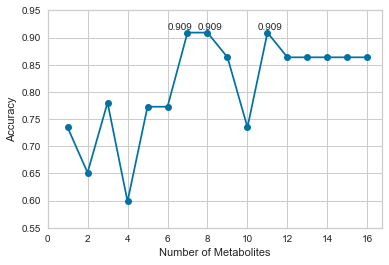

In [51]:
fig = plt.gcf()
# plt.figure(figsize=(10, 6))
plt.plot(serum_accuracy["Number of Metabolites"], serum_accuracy.Accuracy, 'o-')
plt.ylim([0.55, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Number of Metabolites')
# plt.title('Serum RFECV Accuracy Plot')
plt.annotate("0.909", (6, 0.915))
plt.annotate("0.909", (7.5, 0.915))
plt.annotate("0.909", (10.5, 0.915))
plt.xticks(np.arange(0, 16+1, 2))
plt.show()
fig.savefig('Serum RFECV Accuracy Plot.png', dpi=500)

In [59]:
plasma[['asparagine', 'benzoic acid', 'tryptophan', 'uric acid', '5-hydroxynorvaline NIST', 'alpha-ketoglutarate', 'citrulline', 'glutamine', 'hypoxanthine', 'malic acid', 'methionine sulfoxide', 'nornicotine', 'octadecanol', '3-phosphoglycerate', '5-methoxytryptamine', 'adenosine-5-monophosphate', 'aspartic acid', 'lactic acid', 'maltose', 'Class']].\
to_csv('plasma(Specific Metabolics)_rfecv19.csv', index=False)

serum[['cholesterol', 'threonine', 'uric acid', '3-hydroxybutanoic acid', '5-hydroxynorvaline NIST', 'inosine', 'lactic acid', 'Class']].\
to_csv('serum(Specific Metabolics)_rfecv7.csv', index=False)
